## Introduction
This creates a model for pickling that can then be used by Osprey 


In [1]:
from glob import glob
import mdtraj as md
import pickle
import numpy as np
from scipy.stats import circstd, circmean
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/home/robert/Research/AADH/AADH_Analysis/Data/proc_traj'
traj_paths = glob(data_dir+'/2agy-*-as1.nc')

In [3]:
trajs = [md.load(traj_path, top=data_dir+'/2agy-as1.prmtop', stride=10) for traj_path in traj_paths]

## Dihedrals

In [4]:
dihed_idx = pickle.load(open('2agy_as-1_dihedrals.pickl', 'rb'))

In [5]:
dihedrals = [md.compute_dihedrals(traj, dihed_idx) for traj in trajs]

In [6]:
dxx = np.concatenate(dihedrals)

In [7]:
dihed_std = circstd(dxx, np.pi, -np.pi, axis=0)
dihed_mean = circmean(dxx, np.pi, -np.pi, axis=0)

<Container object of 3 artists>

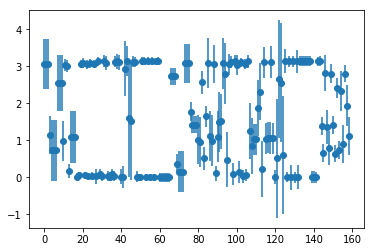

In [8]:
plt.errorbar(x=np.arange(dxx.shape[1]), y=np.abs(dihed_mean[:,]), yerr=dihed_std, fmt='o')

<Container object of 159 artists>

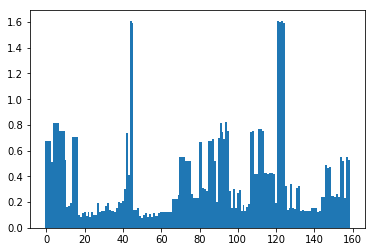

In [9]:
plt.bar(np.arange(dihed_std.shape[0]), dihed_std, width=1)

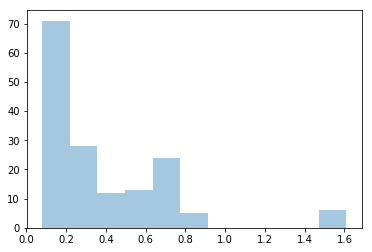

In [10]:
g = sns.distplot(dihed_std, kde=False, norm_hist=False)

In [11]:
import jenks
cuts = jenks.jenks(dihed_std, 2)
cuts

[0.078604929, 0.46951899, 1.6101692]

### Select high variance features
Let's keep those above 1.4 rad circular 

In [12]:
dihed_cut = 1.4
dihed_high_var = np.where(dihed_std>dihed_cut)[0]
dihed_high_var_idx = [dihed_idx[i] for i in dihed_high_var]

In [13]:
import nglview as nv
view = nv.show_mdtraj(trajs[0])

In [16]:
view

A Jupyter Widget

In [18]:
print(nv.__version__)
import ipywidgets
print(ipywidgets.__version__)

1.0.b2
7.0.0
